# Continuously import the latest stock data as a dataset (2024/2/27 - now)

In [ ]:
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import math
from tensorflow.keras.layers import Dropout, Dense, SimpleRNN
from sklearn.preprocessing   import MinMaxScaler
from sklearn import metrics
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
data_path=('/content/drive/MyDrive/CDS 521 AI/')
data_1=pd.read_csv(data_path + '20day_data.csv',index_col=0)
data_2=pd.read_csv(data_path + '10day_data.csv',index_col=0)

Mounted at /content/drive/


In [ ]:
start_time = pd.to_datetime('2024-03-27')
end_time = pd.to_datetime('2024-04-21')

# Use timedelta to increment time in the loop
delta = pd.DateOffset(days=7)

# Initialize an empty list to store data frames
data_frames = []

# Loop through the time range
current_time = start_time
while current_time <= end_time:
    next_time = current_time + delta
    if next_time > end_time:
        next_time = end_time

    # Use yfinance to download minute-level trading data
    try:
        data = yf.download('^HSI', start=current_time, end=next_time, interval='1m')
        data_frames.append(data)
    except Exception as e:
        print(f"Failed to download data for {current_time} to {next_time}: {e}")

    current_time = next_time + pd.DateOffset(days=1)

# Concatenate data frames
Last_data = pd.concat(data_frames)

Last_data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^HSI']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-04-20 00:00:00 -> 2024-04-21 00:00:00)')


,Open,High,Low,Close,Adj Close,Volume
2024-03-27 09:30:00+08:00,16530.439453,16530.439453,16456.380859,16487.310547,16487.310547,0.0
2024-03-27 09:31:00+08:00,16482.669922,16489.099609,16469.089844,16484.470703,16484.470703,0.0
2024-03-27 09:32:00+08:00,16485.189453,16485.189453,16458.439453,16476.669922,16476.669922,0.0
2024-03-27 09:33:00+08:00,16478.669922,16478.669922,16455.130859,16467.099609,16467.099609,0.0
2024-03-27 09:34:00+08:00,16468.849609,16476.310547,16460.710938,16470.339844,16470.339844,0.0
...,...,...,...,...,...,...
2024-04-18 16:04:00+08:00,16410.470703,16410.470703,16410.470703,16410.470703,16410.470703,0.0
2024-04-18 16:05:00+08:00,16410.470703,16410.470703,16410.470703,16410.470703,16410.470703,0.0
2024-04-18 16:06:00+08:00,16410.470703,16410.470703,16410.470703,16410.470703,16410.470703,0.0
2024-04-18 16:07:00+08:00,16410.470703,16410.470703,16410.470703,16410.470703,16410.470703,0.0


In [ ]:
Stock_df = pd.concat([data_1, data_2, Last_data])
Stock_df

,Open,High,Low,Close,Adj Close,Volume
2024-02-27 09:30:00+08:00,16645.630859,16645.630859,16565.740234,16582.089844,16582.089844,0.0
2024-02-27 09:31:00+08:00,16584.359375,16640.109375,16584.359375,16640.109375,16640.109375,0.0
2024-02-27 09:32:00+08:00,16641.439453,16657.060547,16641.439453,16649.810547,16649.810547,0.0
2024-02-27 09:33:00+08:00,16648.359375,16653.029297,16632.099609,16644.289062,16644.289062,0.0
2024-02-27 09:34:00+08:00,16642.900391,16646.810547,16633.500000,16643.949219,16643.949219,0.0
...,...,...,...,...,...,...
2024-04-18 16:04:00+08:00,16410.470703,16410.470703,16410.470703,16410.470703,16410.470703,0.0
2024-04-18 16:05:00+08:00,16410.470703,16410.470703,16410.470703,16410.470703,16410.470703,0.0
2024-04-18 16:06:00+08:00,16410.470703,16410.470703,16410.470703,16410.470703,16410.470703,0.0
2024-04-18 16:07:00+08:00,16410.470703,16410.470703,16410.470703,16410.470703,16410.470703,0.0


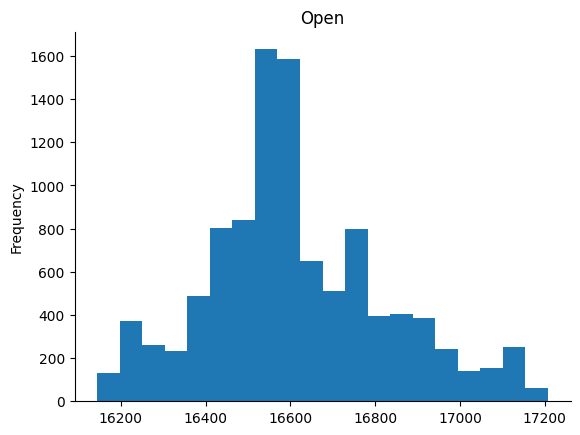

In [ ]:
# @title Open

from matplotlib import pyplot as plt
Stock_df['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(-2000.0, 0, '2024-04-10 10:40:00+08:00'),
  Text(0.0, 0, '2024-02-27 09:30:00+08:00'),
  Text(2000.0, 0, '2024-03-06 15:08:00+08:00'),
  Text(4000.0, 0, '2024-03-15 14:03:00+08:00'),
  Text(6000.0, 0, '2024-03-26 12:00:00+08:00'),
  Text(8000.0, 0, '2024-04-09 10:57:00+08:00'),
  Text(10000.0, 0, '2024-04-18 09:47:00+08:00'),
  Text(12000.0, 0, '')])

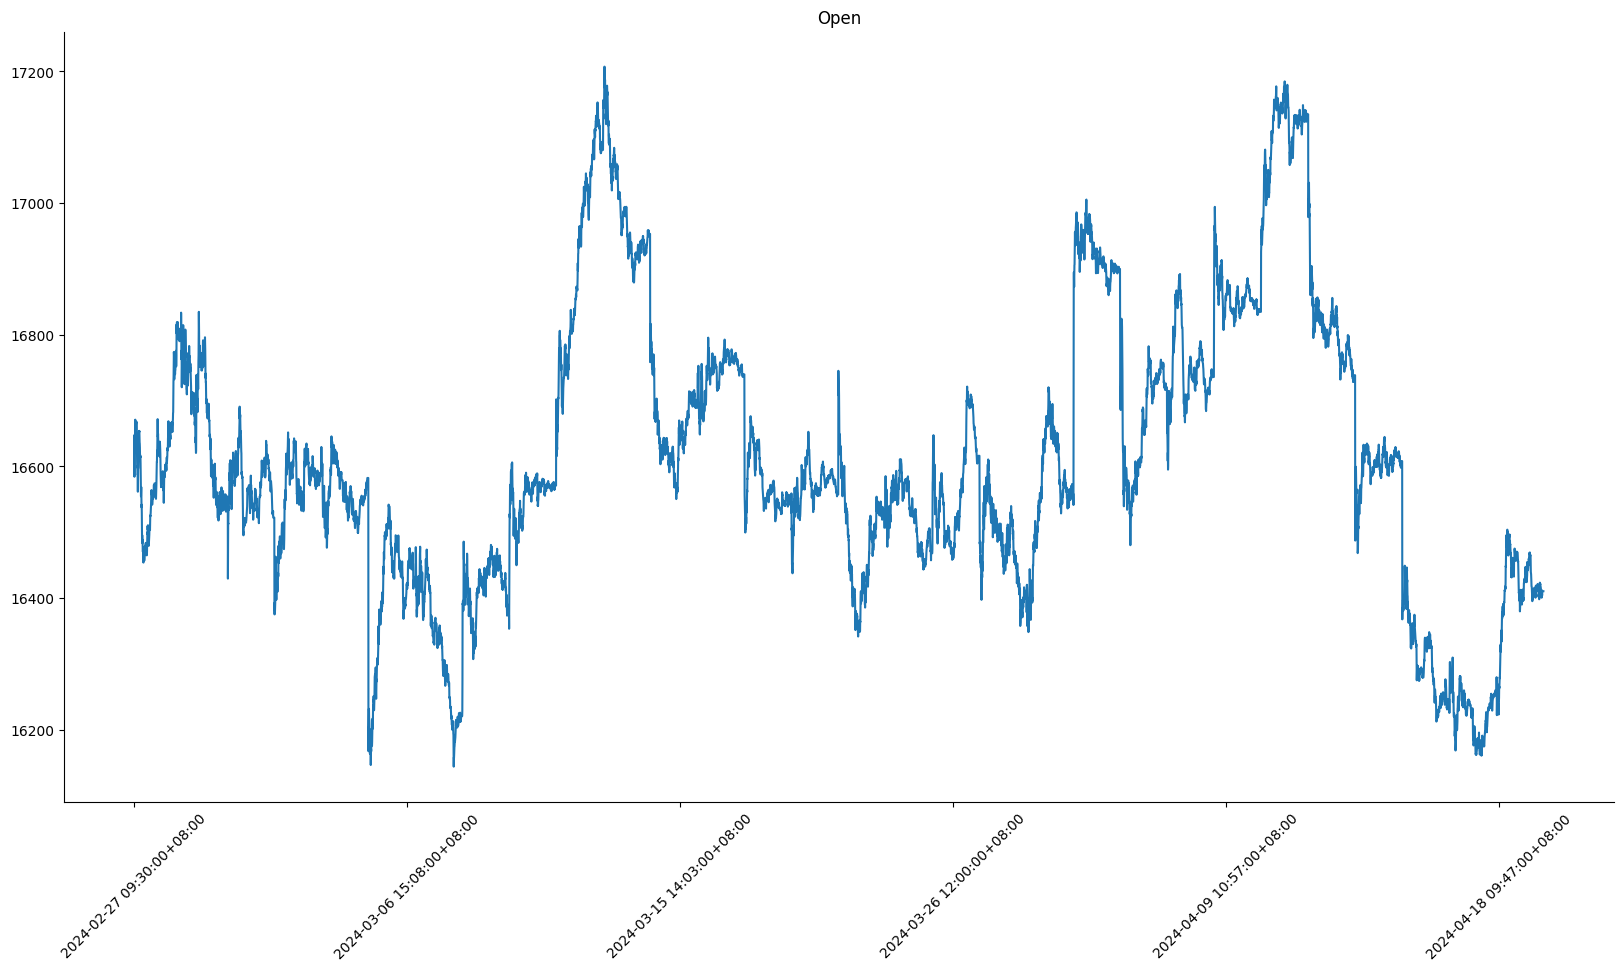

In [ ]:
Stock_df['Open'].plot(kind='line', figsize=(20, 10), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xticks(rotation=45)

### Resegregate the test set (10%) and the training set (90%) ###
### Predicting long term growth is meaningless for stocks, short term trading is more profitable.

In [ ]:
split_index = int(len(Stock_df) * 0.9)
# Split the data into training and test sets
train_data = Stock_df.iloc[:split_index,:1]
test_data = Stock_df.iloc[split_index:,:1]

In [ ]:
train_data

,Open
2024-02-27 09:30:00+08:00,16645.630859
2024-02-27 09:31:00+08:00,16584.359375
2024-02-27 09:32:00+08:00,16641.439453
2024-02-27 09:33:00+08:00,16648.359375
2024-02-27 09:34:00+08:00,16642.900391
...,...
2024-04-15 16:06:00+08:00,16608.109375
2024-04-15 16:07:00+08:00,16608.109375
2024-04-15 16:08:00+08:00,16608.109375
2024-04-16 09:30:00+08:00,16367.690430


In [ ]:
test_data

,Open
2024-04-16 09:32:00+08:00,16381.879883
2024-04-16 09:33:00+08:00,16385.359375
2024-04-16 09:34:00+08:00,16380.929688
2024-04-16 09:35:00+08:00,16397.259766
2024-04-16 09:36:00+08:00,16394.320312
...,...
2024-04-18 16:04:00+08:00,16410.470703
2024-04-18 16:05:00+08:00,16410.470703
2024-04-18 16:06:00+08:00,16410.470703
2024-04-18 16:07:00+08:00,16410.470703


# Data processing(Machine leaning)

### Feature engineering (sliding window)
#### For each time step, construct a sliding window with a window size of 60, using the opening price of the first 60 time steps as the input feature and the opening price of the next time step as the target variable.

In [ ]:
window_size = 60
data = Stock_df.copy()
data = data.iloc[:,:1]
# Calculate the statistical characteristics of each sliding window
data['mean'] = data['Open'].rolling(window=window_size).mean()
data['median'] = data['Open'].rolling(window=window_size).median()
data['std'] = data['Open'].rolling(window=window_size).std()
data['max'] = data['Open'].rolling(window=window_size).max()
data['min'] = data['Open'].rolling(window=window_size).min()
data

,Open,mean,median,std,max,min
2024-02-27 09:30:00+08:00,16645.630859,NaN,NaN,NaN,NaN,NaN
2024-02-27 09:31:00+08:00,16584.359375,NaN,NaN,NaN,NaN,NaN
2024-02-27 09:32:00+08:00,16641.439453,NaN,NaN,NaN,NaN,NaN
2024-02-27 09:33:00+08:00,16648.359375,NaN,NaN,NaN,NaN,NaN
2024-02-27 09:34:00+08:00,16642.900391,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-04-18 16:04:00+08:00,16410.470703,16410.973861,16410.669922,6.323979,16423.419922,16398.210938
2024-04-18 16:05:00+08:00,16410.470703,16411.012207,16410.669922,6.313656,16423.419922,16398.210938
2024-04-18 16:06:00+08:00,16410.470703,16411.123730,16410.669922,6.242426,16423.419922,16398.210938
2024-04-18 16:07:00+08:00,16410.470703,16411.185417,16410.669922,6.216904,16423.419922,16398.210938


### Feature engineering（Exponential Weighted Moving Average）
#### Exponential Weighted Moving Average (EWMA) is a commonly used time series smoothing method.It assigns different weights to the data, with recent data points having higher weights and past data points having lower weights.

In [ ]:
alpha = 0.2
data['ewma'] = data['Open'].ewm(alpha=alpha).mean()
data

,Open,mean,median,std,max,min,ewma
2024-02-27 09:30:00+08:00,16645.630859,NaN,NaN,NaN,NaN,NaN,16645.630859
2024-02-27 09:31:00+08:00,16584.359375,NaN,NaN,NaN,NaN,NaN,16611.591146
2024-02-27 09:32:00+08:00,16641.439453,NaN,NaN,NaN,NaN,NaN,16623.824059
2024-02-27 09:33:00+08:00,16648.359375,NaN,NaN,NaN,NaN,NaN,16632.135480
2024-02-27 09:34:00+08:00,16642.900391,NaN,NaN,NaN,NaN,NaN,16635.337798
...,...,...,...,...,...,...,...
2024-04-18 16:04:00+08:00,16410.470703,16410.973861,16410.669922,6.323979,16423.419922,16398.210938,16409.456394
2024-04-18 16:05:00+08:00,16410.470703,16411.012207,16410.669922,6.313656,16423.419922,16398.210938,16409.659255
2024-04-18 16:06:00+08:00,16410.470703,16411.123730,16410.669922,6.242426,16423.419922,16398.210938,16409.821545
2024-04-18 16:07:00+08:00,16410.470703,16411.185417,16410.669922,6.216904,16423.419922,16398.210938,16409.951377


In [ ]:
split_index = int(len(data) * 0.9)
Train_data = data[:split_index]
Test_data = data[split_index:]
Train_data = Train_data.dropna()
Train_data

,Open,mean,median,std,max,min,ewma
2024-02-27 10:29:00+08:00,16483.570312,16607.588477,16617.609375,48.029143,16671.019531,16483.570312,16516.904924
2024-02-27 10:30:00+08:00,16488.810547,16604.974805,16617.189453,50.144235,16671.019531,16483.570312,16511.286042
2024-02-27 10:31:00+08:00,16479.730469,16603.230990,16617.189453,52.630936,16671.019531,16479.730469,16504.974921
2024-02-27 10:32:00+08:00,16474.730469,16600.452507,16616.149414,54.929880,16671.019531,16474.730469,16498.926026
2024-02-27 10:33:00+08:00,16470.169922,16597.482682,16615.129883,57.071098,16671.019531,16470.169922,16493.174801
...,...,...,...,...,...,...,...
2024-04-15 16:06:00+08:00,16608.109375,16615.215169,16616.314453,7.289510,16629.480469,16597.980469,16607.139213
2024-04-15 16:07:00+08:00,16608.109375,16615.068815,16615.969727,7.343255,16629.480469,16597.980469,16607.333246
2024-04-15 16:08:00+08:00,16608.109375,16614.948958,16615.969727,7.397891,16629.480469,16597.980469,16607.488472
2024-04-16 09:30:00+08:00,16367.690430,16610.787809,16615.750000,32.760316,16629.480469,16367.690430,16559.528863


### Constructing samples for machine learning



In [ ]:
feature_columns = ['mean', 'median', 'std', 'max', 'min', 'ewma']
X_train = Train_data[feature_columns]
Y_train = Train_data['Open']
X_test = Test_data[feature_columns]
Y_test = Test_data['Open']
Y_test

2024-04-16 09:32:00+08:00    16381.879883
2024-04-16 09:33:00+08:00    16385.359375
2024-04-16 09:34:00+08:00    16380.929688
2024-04-16 09:35:00+08:00    16397.259766
2024-04-16 09:36:00+08:00    16394.320312
                                 ...     
2024-04-18 16:04:00+08:00    16410.470703
2024-04-18 16:05:00+08:00    16410.470703
2024-04-18 16:06:00+08:00    16410.470703
2024-04-18 16:07:00+08:00    16410.470703
2024-04-18 16:08:00+08:00    16410.470703
Name: Open, Length: 1033, dtype: float64

### Normalization

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Data processing(Deep learning)

### Normalization

In [ ]:
sc = MinMaxScaler(feature_range=(0, 1))
train_data = sc.fit_transform(train_data)
test_data = sc.transform(test_data)

### Constructing samples for deep learning

In [ ]:
x_train = []
y_train = []

x_test = []
y_test = []

"""
使用前60分钟的开盘价作为输入特征x_train
    第61分钟的开盘价作为输入标签y_train

for循环共构建9296-60=9236组训练数据。
       共构建1033-60=973组测试数据
"""
for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])
    y_test.append(test_data[i, 0])


In [ ]:
x_train

[array([0.47177986, 0.41416136, 0.46783835, 0.47434571, 0.46921218,
        0.47015256, 0.48626025, 0.49565487, 0.48122958, 0.4695685 ,
        0.47594545, 0.46310889, 0.45567034, 0.47236209, 0.48829162,
        0.49181805, 0.49277863, 0.48331789, 0.4608057 , 0.45308429,
        0.44605899, 0.42758198, 0.42946274, 0.41832695, 0.41844082,
        0.41075799, 0.39277689, 0.41499888, 0.42530634, 0.42586101,
        0.42707322, 0.44486515, 0.44565492, 0.44926583, 0.47868211,
        0.47961331, 0.47788132, 0.47956555, 0.469203  , 0.46317501,
        0.46140629, 0.4559238 , 0.44294765, 0.4452031 , 0.44162157,
        0.44324703, 0.43343916, 0.41303364, 0.39433806, 0.38619422,
        0.39473295, 0.3994073 , 0.37533393, 0.37047224, 0.37426131,
        0.36220534, 0.33325191, 0.32133736, 0.33065668, 0.3193813 ]),
 array([0.41416136, 0.46783835, 0.47434571, 0.46921218, 0.47015256,
        0.48626025, 0.49565487, 0.48122958, 0.4695685 , 0.47594545,
        0.46310889, 0.45567034, 0.47236209, 0.

### Feature engineering

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train) # x_train形状为：(9236, 60, 1)
x_test,  y_test  = np.array(x_test),  np.array(y_test)

"""
输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]
"""
x_train = np.reshape(x_train, (x_train.shape[0], 60, 1))
x_test  = np.reshape(x_test,  (x_test.shape[0], 60, 1))


In [ ]:
x_train.shape


(9235, 60, 1)

In [ ]:
y_train.shape

(9235,)

In [ ]:
x_test.shape

(973, 60, 1)

In [ ]:
y_test.shape

(973,)

# Model construction

## Machine Learning Models:

In [ ]:
from sklearn.metrics import make_scorer, mean_squared_error
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor(
    oob_score=True,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=0,
    verbose=3,
    n_jobs=-1
)
rf_params = {'n_estimators': [300, 400, 500], 'max_depth': [5, 10, 15]}
rf_grid = GridSearchCV(rf_model, rf_params, scoring=mse_scorer, cv=3)
rf_grid.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300building tree 18 of 300

building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300building tree 30 of 300

building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300building tree 38 of 300

building tree 39 of 300building tree 40 of 300

building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s


building tree 45 of 300
building tree 46 of 300
building tree 47 of 300building tree 48 of 300

building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78 of 300
building tree 79 of 300
building tree 80 of 300
building tree 81 of 300building tree 82 of 300

building tree 83 of 300building tree 84 of 300

building tree 85 of 300
building tree 86

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.7s



building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300
building tree 154 of 300
building tree 155 of 300
building tree 156 of 300
building tree 157 of 300
building tree 158 of 300
building tree 159 of 300
building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300

[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 300building tree 2 of 300

building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s


building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78 of 300
building tree 79 of 300
building tree 80 of 300
building tree 81 of 300
building tree 82 of 300
building tree 83 of 300
building tree 84 of 300
building tree 85 of 300
building tree 86 of 300
building tree 87 of 300
building tree 88 of 300
building tree 89 of 300
building tree 90 of 300
building tree 91 of 300
building tree 92 of 300
building tree 93 of 300
building tree 94 of 300
building tree 95 of 300
building tree 96 of 300
building tree 97

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.0s


building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300
building tree 154 of 300
building tree 155 of 300
building tree 156 of 300
building tree 157 of 300
building tree 158 of 300
building tree 159 of 300
building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.3s finished


building tree 297 of 300
building tree 298 of 300
building tree 299 of 300
building tree 300 of 300


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300building tree 31 of 300

building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s


building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78 of 300
building tree 79 of 300
building tree 80 of 300
building tree 81 of 300
building tree 82 of 300
building tree 83 of 300
building tree 84 of 300
building tree 85 of 300
building tree 86 of 300
building tree 87 of 300
building tree 88 of 300
building tree 89 of 300
building tree 90 of 300
building tree 91 of 300
building tree 92 of 300
building tree 93 of 300
building tree 94

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.0s



building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300
building tree 154 of 300
building tree 155 of 300
building tree 156 of 300
building tree 157 of 300
building tree 158 of 300
building tree 159 of 300
building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300

[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.4s finished


building tree 291 of 300
building tree 292 of 300
building tree 293 of 300
building tree 294 of 300
building tree 295 of 300
building tree 296 of 300
building tree 297 of 300
building tree 298 of 300
building tree 299 of 300
building tree 300 of 300


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 400building tree 2 of 400

building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s


building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.0s


building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    2.2s


building tree 299 of 400building tree 300 of 400

building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400building tree 327 of 400

building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400building tree 4 of 400

building tree 5 of 400building tree 6 of 400

building tree 7 of 400building tree 8 of 400

building tree 9 of 400
building tree 10 of 400
building tree 11 of 400building tree 12 of 400

building tree 13 of 400building tree 14 of 400

building tree 15 of 400building tree 16 of 400

building tree 17 of 400building tree 18 of 400

building tree 19 of 400building tree 20 of 400

building tree 21 of 400building tree 22 of 400

building tree 23 of 400building tree 24 of 400

building tree 25 of 400building tree 26 of 400

building tree 27 of 400
building tree 28 of 400building tree 29 of 400

building tree 30 of 400building tree 31 of 400



[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s


building tree 32 of 400building tree 33 of 400

building tree 34 of 400building tree 35 of 400

building tree 36 of 400building tree 37 of 400

building tree 38 of 400building tree 39 of 400

building tree 40 of 400building tree 41 of 400

building tree 42 of 400building tree 43 of 400

building tree 44 of 400building tree 45 of 400

building tree 46 of 400building tree 47 of 400

building tree 48 of 400building tree 49 of 400

building tree 50 of 400building tree 51 of 400

building tree 52 of 400building tree 53 of 400

building tree 54 of 400
building tree 55 of 400
building tree 56 of 400building tree 57 of 400

building tree 58 of 400
building tree 59 of 400
building tree 60 of 400building tree 61 of 400

building tree 62 of 400building tree 63 of 400

building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.8s


building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400building tree 140 of 400

building tree 141 of 400building tree 142 of 400

building tree 143 of 400building tree 144 of 400

building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400building tree 151 of 400

building tree 152 of 400
building tree 153 of 400
building tree 154 of 400building tree 155 of 400

building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400building tree 162 of 400

building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    3.5s



building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400

[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s


building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.0s


building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    2.3s


building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500building tree 29 of 500

building tree 30 of 500building tree 31 of 500

building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s


building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78 of 500
building tree 79 of 500
building tree 80 of 500
building tree 81 of 500
building tree 82 of 500
building tree 83 of 500
building tree 84 of 500
building tree 85 of 500
building tree 86 of 500
building tree 87 of 500
building tree 88 of 500
building tree 89 of 500
building tree 90 of 500
building tree 91 of 500
building tree 92 of 500
building tree 93 of 500
building tree 94 of 500
building tree 95 of 500
building tree 96 of 500
building tree 97

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.0s


building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    2.5s


building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500
building tree 319 of 500
building tree 320 of 500
building tree 321 of 500
building tree 322 of 500
building tree 323 of 500
building tree 324 of 500
building tree 325 of 500
building tree 326 of 500
building tree 327 of 500
building tree 328 of 500
building tree 329 of 500
building tree 330 of 500
building tree 331 of 500
building tree 332 of 500
building tree 333 of 500
building tree 334 of 500
building tree 335 of 500
building tree 336 of 500
building tree 337 of 500
building tree 338 of 500
building tree 339 of 500
building tree 340 of 500
building tree 341 of 500
building tree 342 of 500
building tree 343 of 500
building tree 344 of 500
building tree 345 of 500
building tree 346 of 500
building tree 347 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500building tree 4 of 500

building tree 5 of 500building tree 6 of 500

building tree 7 of 500building tree 8 of 500

building tree 9 of 500building tree 10 of 500

building tree 11 of 500building tree 12 of 500

building tree 13 of 500building tree 14 of 500

building tree 15 of 500building tree 16 of 500

building tree 17 of 500building tree 18 of 500

building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500building tree 24 of 500

building tree 25 of 500building tree 26 of 500

building tree 27 of 500building tree 28 of 500

building tree 29 of 500building tree 30 of 500



[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s


building tree 31 of 500building tree 32 of 500

building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500building tree 53 of 500

building tree 54 of 500building tree 55 of 500

building tree 56 of 500building tree 57 of 500

building tree 58 of 500building tree 59 of 500

building tree 60 of 500building tree 61 of 500

building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500building tree 67 of 500

building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.9s



building tree 130 of 500building tree 131 of 500

building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500building tree 138 of 500

building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500building tree 149 of 500

building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500building tree 160 of 500

building tree 161 of 500
building tree 162 of 500building tree 163 of 500

building tree 164 of 500building tree 165 of 500

building tree 166 of 500building tree 167 of 500

building tree 168 of 500
building tree 169 of 500

[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    3.6s



building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500
building tree 319 of 500
building tree 320 of 500
building tree 321 of 500
building tree 322 of 500
building tree 323 of 500
building tree 324 of 500
building tree 325 of 500
building tree 326 of 500
building tree 327 of 500
building tree 328 of 500
building tree 329 of 500
building tree 330 of 500
building tree 331 of 500
building tree 332 of 500
building tree 333 of 500
building tree 334 of 500
building tree 335 of 500
building tree 336 of 500
building tree 337 of 500
building tree 338 of 500
building tree 339 of 500
building tree 340 of 500
building tree 341 of 500
building tree 342 of 500
building tree 343 of 500
building tree 344 of 500
building tree 345 of 500
building tree 346 of 500
building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 500building tree 2 of 500

building tree 3 of 500
building tree 4 of 500
building tree 5 of 500building tree 6 of 500

building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s


building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78 of 500
building tree 79 of 500
building tree 80 of 500
building tree 81 of 500
building tree 82 of 500
building tree 83 of 500
building tree 84 of 500
building tree 85 of 500
building tree 86 of 500
building tree 87 of 500
building tree 88 of 500
building tree 89 of 500
building tree 90 of 500
building tree 91 of 500
building tree 92 of 500
building tree 93 of 500
building tree 94 of 500
building tree 95 of 500
building tree 96

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.0s



building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500
building tree 161 of 500building tree 162 of 500

building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500

[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    2.2s


building tree 297 of 500
building tree 298 of 500
building tree 299 of 500
building tree 300 of 500
building tree 301 of 500
building tree 302 of 500
building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500
building tree 319 of 500
building tree 320 of 500
building tree 321 of 500
building tree 322 of 500
building tree 323 of 500
building tree 324 of 500
building tree 325 of 500
building tree 326 of 500
building tree 327 of 500
building tree 328 of 500
building tree 329 of 500
building tree 330 of 500
building tree 331 of 500
building tree 332 of 500
building tree 333 of 500
building tree 334 of 500
building tree 335 of 500
building tree 336 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 300building tree 2 of 300

building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s


building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300building tree 56 of 300

building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.5s


building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300
building tree 154 of 300
building tree 155 of 300
building tree 156 of 300
building tree 157 of 300
building tree 158 of 300
building tree 159 of 300
building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    3.6s


building tree 288 of 300building tree 289 of 300

building tree 290 of 300
building tree 291 of 300
building tree 292 of 300
building tree 293 of 300
building tree 294 of 300building tree 295 of 300

building tree 296 of 300building tree 297 of 300

building tree 298 of 300building tree 299 of 300

building tree 300 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300building tree 4 of 300

building tree 5 of 300building tree 6 of 300

building tree 7 of 300building tree 8 of 300

building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300building tree 18 of 300

building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s


building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300building tree 60 of 300

building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    2.3s


building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300
building tree 154 of 300
building tree 155 of 300
building tree 156 of 300
building tree 157 of 300
building tree 158 of 300
building tree 159 of 300
building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.5s finished


building tree 292 of 300
building tree 293 of 300
building tree 294 of 300
building tree 295 of 300
building tree 296 of 300
building tree 297 of 300
building tree 298 of 300
building tree 299 of 300
building tree 300 of 300


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 300building tree 2 of 300

building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300

[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s



building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 7

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.5s


building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300
building tree 154 of 300
building tree 155 of 300
building tree 156 of 300
building tree 157 of 300
building tree 158 of 300
building tree 159 of 300
building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.6s finished


building tree 299 of 300
building tree 300 of 300


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 400building tree 2 of 400

building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s


building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400building tree 49 of 400

building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.5s


building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    3.3s


building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400building tree 315 of 400

building tree 316 of 400building tree 317 of 400

building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    5.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s


building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.6s


building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    3.5s


building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400building tree 312 of 400

building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400building tree 318 of 400

building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 400building tree 2 of 400

building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400building tree 51 of 400

building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.5s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    3.4s


building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500building tree 4 of 500

building tree 5 of 500building tree 6 of 500

building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500building tree 18 of 500

building tree 19 of 500building tree 20 of 500

building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s


building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500building tree 54 of 500

building tree 55 of 500
building tree 56 of 500
building tree 57 of 500building tree 58 of 500

building tree 59 of 500building tree 60 of 500

building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    2.5s


building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500building tree 142 of 500

building tree 143 of 500building tree 144 of 500

building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500building tree 150 of 500

building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500building tree 156 of 500

building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    4.7s


building tree 302 of 500
building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500
building tree 319 of 500
building tree 320 of 500
building tree 321 of 500
building tree 322 of 500
building tree 323 of 500
building tree 324 of 500
building tree 325 of 500
building tree 326 of 500
building tree 327 of 500
building tree 328 of 500
building tree 329 of 500
building tree 330 of 500
building tree 331 of 500
building tree 332 of 500
building tree 333 of 500
building tree 334 of 500
building tree 335 of 500
building tree 336 of 500
building tree 337 of 500
building tree 338 of 500
building tree 339 of 500
building tree 340 of 500building tree 341 of 500



[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 500building tree 2 of 500

building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s


building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78 of 500
building tree 79

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.5s


building tree 128 of 500
building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    3.3s


building tree 292 of 500
building tree 293 of 500
building tree 294 of 500
building tree 295 of 500
building tree 296 of 500
building tree 297 of 500
building tree 298 of 500
building tree 299 of 500
building tree 300 of 500
building tree 301 of 500
building tree 302 of 500
building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500
building tree 319 of 500
building tree 320 of 500
building tree 321 of 500
building tree 322 of 500
building tree 323 of 500
building tree 324 of 500
building tree 325 of 500
building tree 326 of 500
building tree 327 of 500
building tree 328 of 500
building tree 329 of 500
building tree 330 of 500
building tree 331 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500building tree 23 of 500

building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.9s


building tree 36 of 500
building tree 37 of 500building tree 38 of 500

building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    2.7s


building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    4.7s


building tree 291 of 500building tree 292 of 500

building tree 293 of 500
building tree 294 of 500
building tree 295 of 500
building tree 296 of 500
building tree 297 of 500
building tree 298 of 500
building tree 299 of 500
building tree 300 of 500
building tree 301 of 500
building tree 302 of 500
building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500
building tree 319 of 500
building tree 320 of 500
building tree 321 of 500
building tree 322 of 500
building tree 323 of 500
building tree 324 of 500
building tree 325 of 500
building tree 326 of 500
building tree 327 of 500
building tree 328 of 500
building tree 329 of 500
building tree 330 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 300building tree 2 of 300

building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300building tree 26 of 300

building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s


building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300building tree 55 of 300

building tree 56 of 300building tree 57 of 300

building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.5s


building tree 137 of 300building tree 138 of 300

building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300
building tree 154 of 300
building tree 155 of 300
building tree 156 of 300
building tree 157 of 300
building tree 158 of 300
building tree 159 of 300
building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    3.6s


building tree 295 of 300building tree 296 of 300

building tree 297 of 300
building tree 298 of 300
building tree 299 of 300
building tree 300 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300building tree 30 of 300



[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s


building tree 31 of 300building tree 32 of 300

building tree 33 of 300
building tree 34 of 300
building tree 35 of 300building tree 36 of 300

building tree 37 of 300building tree 38 of 300

building tree 39 of 300building tree 40 of 300

building tree 41 of 300building tree 42 of 300

building tree 43 of 300building tree 44 of 300

building tree 45 of 300building tree 46 of 300

building tree 47 of 300building tree 48 of 300

building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300building tree 58 of 300

building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    2.4s


building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300
building tree 154 of 300
building tree 155 of 300
building tree 156 of 300
building tree 157 of 300
building tree 158 of 300
building tree 159 of 300
building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    4.5s


building tree 287 of 300
building tree 288 of 300building tree 289 of 300

building tree 290 of 300
building tree 291 of 300
building tree 292 of 300building tree 293 of 300

building tree 294 of 300
building tree 295 of 300
building tree 296 of 300
building tree 297 of 300
building tree 298 of 300
building tree 299 of 300
building tree 300 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300building tree 4 of 300

building tree 5 of 300
building tree 6 of 300building tree 7 of 300

building tree 8 of 300building tree 9 of 300

building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.7s


building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300building tree 50 of 300

building tree 51 of 300building tree 52 of 300

building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    3.1s


building tree 128 of 300
building tree 129 of 300
building tree 130 of 300building tree 131 of 300

building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300building tree 147 of 300

building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300
building tree 154 of 300
building tree 155 of 300
building tree 156 of 300
building tree 157 of 300
building tree 158 of 300
building tree 159 of 300
building tree 160 of 300
building tree 161 of 300
building tree 162 of 300building tree 163 of 300

building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    7.4s


building tree 287 of 300
building tree 288 of 300
building tree 289 of 300
building tree 290 of 300
building tree 291 of 300
building tree 292 of 300
building tree 293 of 300
building tree 294 of 300
building tree 295 of 300
building tree 296 of 300
building tree 297 of 300
building tree 298 of 300
building tree 299 of 300
building tree 300 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    8.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400building tree 10 of 400

building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.1s


building tree 35 of 400building tree 36 of 400

building tree 37 of 400
building tree 38 of 400
building tree 39 of 400building tree 40 of 400

building tree 42 of 400
building tree 41 of 400
building tree 43 of 400building tree 44 of 400

building tree 45 of 400building tree 46 of 400

building tree 47 of 400building tree 48 of 400

building tree 49 of 400building tree 50 of 400

building tree 51 of 400
building tree 52 of 400
building tree 53 of 400building tree 54 of 400

building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    2.9s


building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    4.8s


building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    6.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 400building tree 2 of 400

building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400

[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s



building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400building tree 49 of 400

building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 7

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.6s


building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    3.5s


building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400building tree 311 of 400

building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    5.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400building tree 4 of 400

building tree 5 of 400building tree 6 of 400

building tree 7 of 400building tree 8 of 400

building tree 9 of 400building tree 10 of 400

building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s


building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400building tree 37 of 400

building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400building tree 47 of 400

building tree 48 of 400
building tree 49 of 400
building tree 50 of 400building tree 51 of 400

building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    2.5s


building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    4.6s


building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    6.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 500building tree 2 of 500

building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s


building tree 35 of 500building tree 36 of 500

building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.5s


building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    4.4s


building tree 286 of 500
building tree 287 of 500
building tree 288 of 500
building tree 289 of 500
building tree 290 of 500
building tree 291 of 500
building tree 292 of 500
building tree 293 of 500
building tree 294 of 500
building tree 295 of 500
building tree 296 of 500
building tree 297 of 500
building tree 298 of 500
building tree 299 of 500
building tree 300 of 500
building tree 301 of 500
building tree 302 of 500
building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500
building tree 319 of 500
building tree 320 of 500
building tree 321 of 500
building tree 322 of 500
building tree 323 of 500
building tree 324 of 500
building tree 325 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   12.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s


building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.5s


building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    4.7s


building tree 287 of 500
building tree 288 of 500
building tree 289 of 500
building tree 290 of 500
building tree 291 of 500
building tree 292 of 500
building tree 293 of 500
building tree 294 of 500
building tree 295 of 500
building tree 296 of 500
building tree 297 of 500
building tree 298 of 500
building tree 299 of 500
building tree 300 of 500
building tree 301 of 500
building tree 302 of 500
building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500
building tree 319 of 500
building tree 320 of 500
building tree 321 of 500
building tree 322 of 500
building tree 323 of 500
building tree 324 of 500
building tree 325 of 500
building tree 326 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   10.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500building tree 4 of 500

building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s


building tree 32 of 500building tree 33 of 500

building tree 34 of 500building tree 35 of 500

building tree 36 of 500
building tree 37 of 500
building tree 38 of 500building tree 39 of 500

building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500building tree 62 of 500

building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    2.6s


building tree 126 of 500
building tree 127 of 500
building tree 128 of 500
building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500building tree 153 of 500

building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    6.6s


building tree 290 of 500
building tree 291 of 500
building tree 292 of 500
building tree 293 of 500
building tree 294 of 500
building tree 295 of 500
building tree 296 of 500
building tree 297 of 500
building tree 298 of 500
building tree 299 of 500
building tree 300 of 500
building tree 301 of 500
building tree 302 of 500
building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500
building tree 319 of 500
building tree 320 of 500
building tree 321 of 500building tree 322 of 500

building tree 323 of 500
building tree 324 of 500
building tree 325 of 500
building tree 326 of 500
building tree 327 of 500
building tree 328 of 500
building tree 329 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   13.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500building tree 15 of 500

building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.1s


building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    4.2s


building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   11.4s


building tree 289 of 500
building tree 290 of 500
building tree 291 of 500
building tree 292 of 500
building tree 293 of 500
building tree 294 of 500
building tree 295 of 500
building tree 296 of 500
building tree 297 of 500building tree 298 of 500

building tree 299 of 500
building tree 300 of 500
building tree 301 of 500
building tree 302 of 500
building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500
building tree 319 of 500
building tree 320 of 500
building tree 321 of 500
building tree 322 of 500
building tree 323 of 500
building tree 324 of 500
building tree 325 of 500
building tree 326 of 500
building tree 327 of 500
building tree 328 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   18.2s finished


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(min_samples_leaf=10,
                                             min_samples_split=20, n_jobs=-1,
                                             oob_score=True, random_state=0,
                                             verbose=3),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [300, 400, 500]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [ ]:
# best parameter
rf_grid.best_params_

{'max_depth': 10, 'n_estimators': 500}

### SVM

In [ ]:
from sklearn.svm import SVR

svm_model = SVR(
    kernel='rbf',  # 使用径向基函数 (radial basis function) 作为核函数
    epsilon=0.1,   # epsilon-tube，其中不会惩罚预测值的误差
    verbose=True
)
svm_params = {'C': [1000000, 10000000, 100000000], 'gamma': [0.001, 0.0001, 0.00001]}
svm_grid = GridSearchCV(svm_model, svm_params, scoring=mse_scorer, cv=3)
svm_grid.fit(X_train, Y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=3, estimator=SVR(verbose=True),
             param_grid={'C': [1000000, 10000000, 100000000],
                         'gamma': [0.001, 0.0001, 1e-05]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [ ]:
svm_grid.best_params_

{'C': 1000000, 'gamma': 0.001}

### KNN



In [ ]:
# KNN
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(
    weights='uniform',  # 所有邻居的权重相同
    algorithm='auto',  # 计算最近邻的方法
    leaf_size=30,     # 传递给‘ball_tree’或‘kd_tree’的叶子大小
    p=2,              # 使用欧氏距离
    metric='minkowski',  # 距离度量
    n_jobs=-1           # 使用所有可用的CPU核心
)
knn_params = {'n_neighbors': [3, 5, 7]}
knn_grid = GridSearchCV(knn_model, knn_params, scoring=mse_scorer, cv=3)
knn_grid.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(n_jobs=-1),
             param_grid={'n_neighbors': [3, 5, 7]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [ ]:
knn_grid.best_params_

{'n_neighbors': 7}

### XGBoost

In [ ]:

from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    max_depth = 5,
    min_child_weight = 1,
    subsample = 0.8,
    colsample_bytree = 0.8,
    gamma = 0,
    reg_alpha = 0,
    reg_lambda = 1
)
xgb_params = {'n_estimators': [5000,6000,7000], 'learning_rate': [0.1, 0.01, 0.001]}
xgb_grid = GridSearchCV(xgb_model, xgb_params, scoring=mse_scorer, cv=3)
xgb_grid.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_b...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [5000, 6000, 7000]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [ ]:
xgb_grid.best_params_

{'learning_rate': 0.01, 'n_estimators': 6000}

## Deep Learning Models:

### RNN(LSTM)

#### Hyper parameters

In [ ]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.7 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
import tensorflow as tf

def Bulid_model(hp):
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(
            units=hp.Int('lstm_units_1', min_value=50, max_value=150, step=25),
            return_sequences=True
        ),
        tf.keras.layers.Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)),
        tf.keras.layers.LSTM(units=hp.Int('lstm_units_2', min_value=50, max_value=150, step=25)),
        tf.keras.layers.Dense(
            units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
            activation='relu'
        ),
        tf.keras.layers.Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)),
        tf.keras.layers.Dense(1)
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='mean_squared_error'
    )
    return model


In [ ]:
tuner = kt.RandomSearch(
    Bulid_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='rnn_tuning'
)

tuner.search(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=128)

Trial 10 Complete [00h 00m 21s]
val_loss: 0.00014153165102470666

Best val_loss So Far: 8.714954310562462e-05
Total elapsed time: 00h 04m 10s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best parameters：")
print(f"LSTM layer 1: {best_hps.get('lstm_units_1')}")
print(f"Dropout 1 : {best_hps.get('dropout_1')}")
print(f"LSTM layer 2: {best_hps.get('lstm_units_2')}")
print(f"Dense: {best_hps.get('dense_units')}")
print(f"Dropout 2 : {best_hps.get('dropout_2')}")
print(f"Learning rate: {best_hps.get('learning_rate')}")

Best parameters：
LSTM layer 1: 75
Dropout 1 : 0.0
LSTM layer 2: 100
Dense: 96
Dropout 2 : 0.1
Learning rate: 0.007578897916446779


#### Model Construct

In [ ]:
rnn_model = tf.keras.Sequential([
tf.keras.layers.LSTM(75, return_sequences=True),
tf.keras.layers.Dropout(0),
tf.keras.layers.LSTM(100),
tf.keras.layers.Dense(96, activation='relu'),
tf.keras.layers.Dropout(0.1),
tf.keras.layers.Dense(1)
])

rnn_model.compile(optimizer=tf.keras.optimizers.Adam(0.007),
loss='mean_squared_error') # 损失函数用均方误差

rnn_history = rnn_model.fit(x_train, y_train,
batch_size=128,
epochs=20,
validation_data=(x_test, y_test),
validation_freq=1) #测试的epoch间隔数

rnn_model.summary()

Epoch 1/20
73/73 [==============================] - 5s 21ms/step - loss: 0.0112 - val_loss: 2.3101e-04
Epoch 2/20
73/73 [==============================] - 1s 9ms/step - loss: 0.0014 - val_loss: 1.4684e-04
Epoch 3/20
73/73 [==============================] - 1s 9ms/step - loss: 0.0012 - val_loss: 1.3767e-04
Epoch 4/20
73/73 [==============================] - 1s 9ms/step - loss: 0.0011 - val_loss: 1.7410e-04
Epoch 5/20
73/73 [==============================] - 1s 9ms/step - loss: 0.0011 - val_loss: 2.2677e-04
Epoch 6/20
73/73 [==============================] - 1s 11ms/step - loss: 8.8916e-04 - val_loss: 1.7011e-04
Epoch 7/20
73/73 [==============================] - 1s 12ms/step - loss: 8.8289e-04 - val_loss: 2.1798e-04
Epoch 8/20
73/73 [==============================] - 1s 13ms/step - loss: 8.3534e-04 - val_loss: 1.9135e-04
Epoch 9/20
73/73 [==============================] - 1s 20ms/step - loss: 7.0866e-04 - val_loss: 6.1587e-04
Epoch 10/20
73/73 [==============================] - 1s 19ms/

#### Fitting Curve

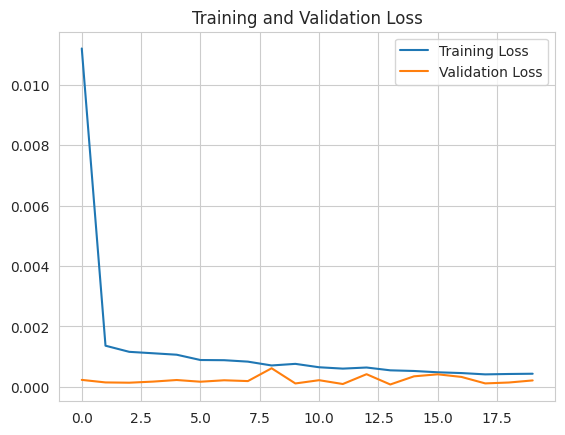

In [ ]:
plt.plot(rnn_history.history['loss']   , label='Training Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### Autoencoder + RNN

#### Hyper parameters

In [ ]:
from keras.layers import Input, LSTM, RepeatVector, Dropout
from keras.models import Model
from keras_tuner import HyperModel

class LSTMEncoderDecoderHyperModel(HyperModel):
    def __init__(self, timesteps, input_dim):
        self.timesteps = timesteps
        self.input_dim = input_dim

    def build(self, hp):
        inputs = Input(shape=(self.timesteps, self.input_dim))

        # Encoder
        encoded = LSTM(
            units=hp.Int('lstm_units_1', min_value=50, max_value=200, step=50),
            return_sequences=True
        )(inputs)
        encoded = Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1))(encoded)
        encoded = LSTM(hp.Int('encoding_dim', min_value=16, max_value=64, step=16))(encoded)

        # Decoder
        repeated_encoded = RepeatVector(self.timesteps)(encoded)
        decoded = LSTM(self.input_dim, return_sequences=True)(repeated_encoded)

        autoencoder = Model(inputs, decoded)
        autoencoder.compile(
            optimizer='adam',
            loss='mean_squared_error'
        )
        return autoencoder

In [ ]:
from keras_tuner import RandomSearch
from keras.callbacks import EarlyStopping
tuner = RandomSearch(
    LSTMEncoderDecoderHyperModel(timesteps=60, input_dim=1),
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_autoencoder_tuning'
)

tuner.search(x_train, x_train,
             epochs=20,
             batch_size=128,
             validation_data=(x_test, x_test),
             callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1)])

Trial 10 Complete [00h 00m 50s]
val_loss: 0.0006177387549541891

Best val_loss So Far: 0.0006177387549541891
Total elapsed time: 00h 05m 30s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best parameters：")
print(f"LSTM layer: {best_hps.get('lstm_units_1')}")
print(f"Dropout: {best_hps.get('dropout_1')}")
print(f"Encoding dimension: {best_hps.get('encoding_dim')}")


Best parameters：
LSTM layer: 200
Dropout: 0.4
Encoding dimension: 64


#### Model Construct

In [ ]:
from keras.layers import Input, LSTM, RepeatVector, Dropout
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define autoencoder parameters
encoding_dim = 64  # The desired dimension of the encoded representation
timesteps = 60     # Number of time steps in the input features
input_dim = 1      # Dimension of features at each time step

# Define the input layer
inputs = Input(shape=(timesteps, input_dim))

# Encoder part
encoded = LSTM(200, return_sequences=True)(inputs)  # LSTM layer with 200 units, keep the sequences
encoded = Dropout(0.4)(encoded)                     # Dropout layer with a 40% dropout rate
encoded = LSTM(encoding_dim)(encoded)               # Second LSTM layer with `encoding_dim` units

# Repeat the encoded output for the decoder
repeated_encoded = RepeatVector(timesteps)(encoded)

# Decoder part, returning to the original sequence shape
decoded = LSTM(input_dim, return_sequences=True)(repeated_encoded)

# Construct the autoencoder model by chaining encoder and decoder
autoencoder = Model(inputs, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Add callbacks for early stopping and optionally model checkpointing
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1),
    ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)
]

# Train the autoencoder
history = autoencoder.fit(
    x_train, x_train,
    batch_size=128,
    epochs=20,
    shuffle=True,
    validation_data=(x_test, y_test),
    callbacks=callbacks
)

# Print the model summary to check the architecture
autoencoder.summary()


Epoch 1/20
73/73 [==============================] - 7s 28ms/step - loss: 0.0168 - val_loss: 0.0028
Epoch 2/20
11/73 [===>..........................] - ETA: 0s - loss: 0.0030

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


73/73 [==============================] - 1s 13ms/step - loss: 0.0023 - val_loss: 0.0030
Epoch 3/20
73/73 [==============================] - 1s 13ms/step - loss: 0.0018 - val_loss: 0.0033
Epoch 4/20
73/73 [==============================] - 1s 12ms/step - loss: 0.0016 - val_loss: 0.0031
Epoch 5/20
73/73 [==============================] - 1s 12ms/step - loss: 0.0016 - val_loss: 0.0031
Epoch 6/20
73/73 [==============================] - 1s 13ms/step - loss: 0.0015 - val_loss: 0.0034
Epoch 6: early stopping
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 60, 1)]           0         
                                                                 
 lstm_8 (LSTM)               (None, 60, 200)           161600    
                                                                 
 dropout_4 (Dropout)         (None, 60, 200)           0         
             

#### Fitting Curve

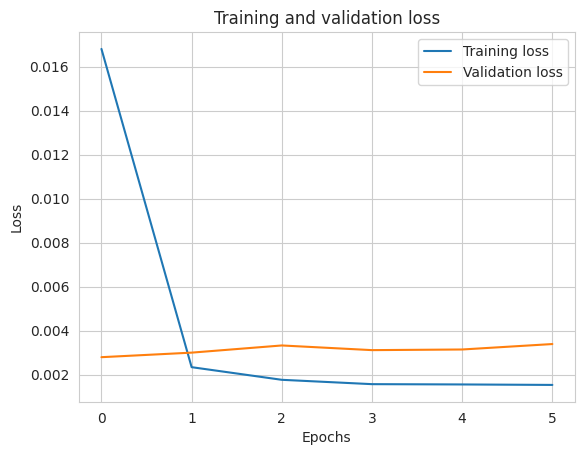

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Prediction

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.1s finished


31/31 [==============================] - 2s 7ms/step


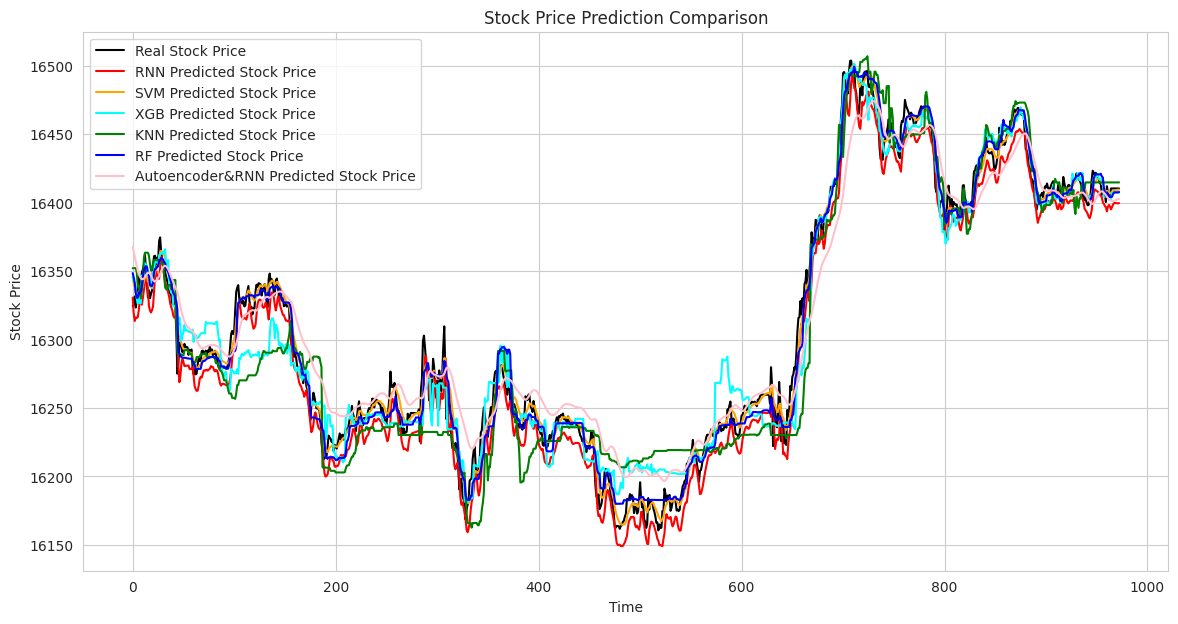

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 真实股票价格逆归一化
real_stock_price = sc.inverse_transform(test_data[60:])
index = np.arange(len(real_stock_price))

svm_predictions = svm_grid.predict(X_test)
xgb_predictions = xgb_grid.predict(X_test)
knn_predictions = knn_grid.predict(X_test)
rf_predictions = rf_grid.predict(X_test)

svm_predictions_series = pd.Series(svm_predictions[60:], index=index)
xgb_predictions_series = pd.Series(xgb_predictions[60:], index=index)
knn_predictions_series = pd.Series(knn_predictions[60:], index=index)
rf_predictions_series = pd.Series(rf_predictions[60:], index=index)

# RNN 模型预测并逆归一化
predicted_rnn = rnn_model.predict(x_test)
predicted_rnn = sc.inverse_transform(predicted_rnn)

# Autoencoder + RNN 模型预测并逆归一化
autoencoder.load_weights('best_model.h5')
predicted_au = autoencoder.predict(x_test)
predicted_au = sc.inverse_transform(predicted_au[:, -1, :].reshape(-1, 1))

# 画出真实数据和所有模型的预测数据对比曲线
plt.figure(figsize=(14, 7))
plt.plot(real_stock_price, color='black', label='Real Stock Price')
plt.plot(predicted_rnn, color='red', label='RNN Predicted Stock Price')
plt.plot(svm_predictions_series, color='orange', label='SVM Predicted Stock Price')
plt.plot(xgb_predictions_series, color='cyan', label='XGB Predicted Stock Price')
plt.plot(knn_predictions_series, color='green', label='KNN Predicted Stock Price')
plt.plot(rf_predictions_series, color='blue', label='RF Predicted Stock Price')
plt.plot(predicted_au, color='pink', label='Autoencoder&RNN Predicted Stock Price')
plt.title('Stock Price Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Visualization of each model

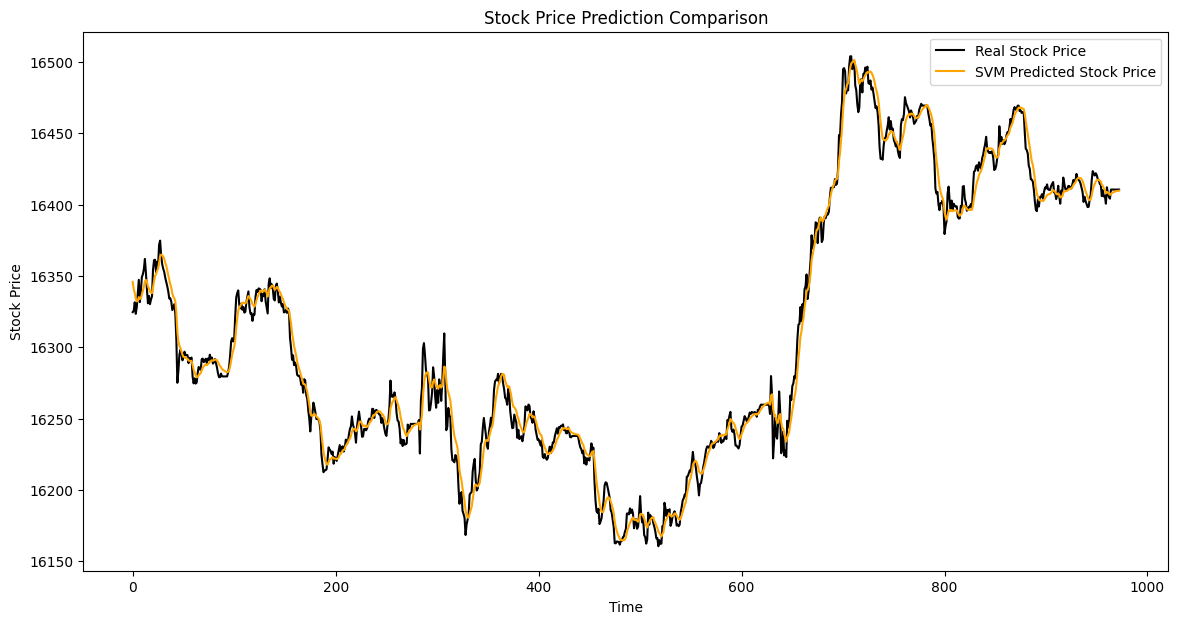

In [ ]:
# SVM
plt.figure(figsize=(14, 7))
plt.plot(real_stock_price, color='black', label='Real Stock Price')
plt.plot(svm_predictions_series, color='orange', label='SVM Predicted Stock Price')
plt.title('Stock Price Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

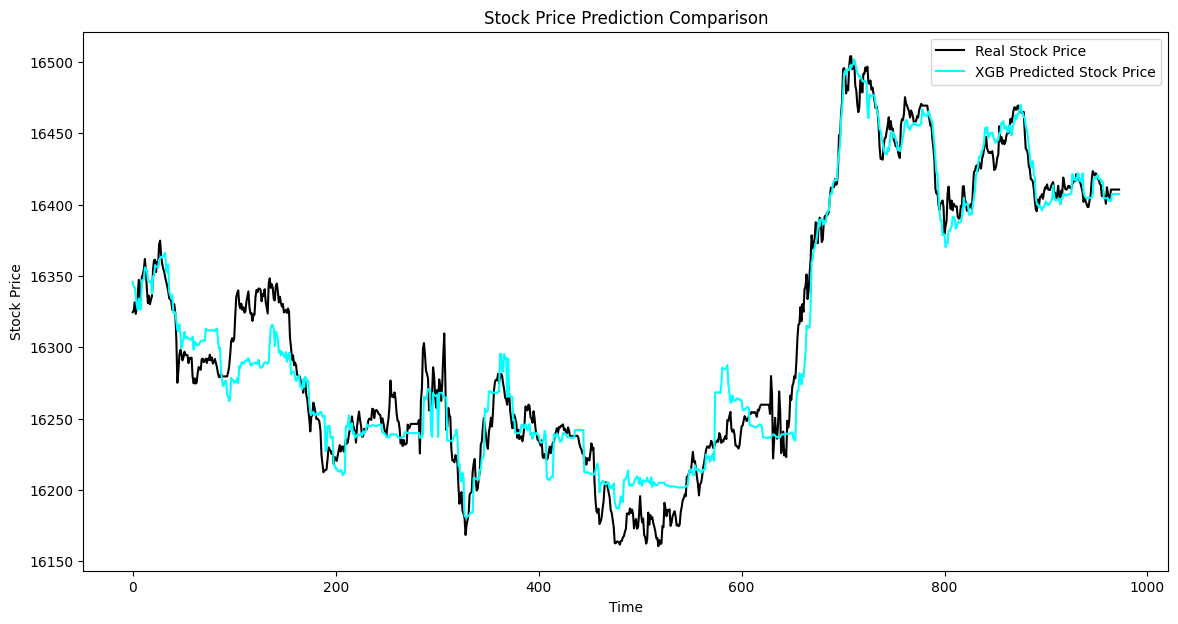

In [ ]:
# XGB
plt.figure(figsize=(14, 7))
plt.plot(real_stock_price, color='black', label='Real Stock Price')
plt.plot(xgb_predictions_series, color='cyan', label='XGB Predicted Stock Price')
plt.title('Stock Price Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

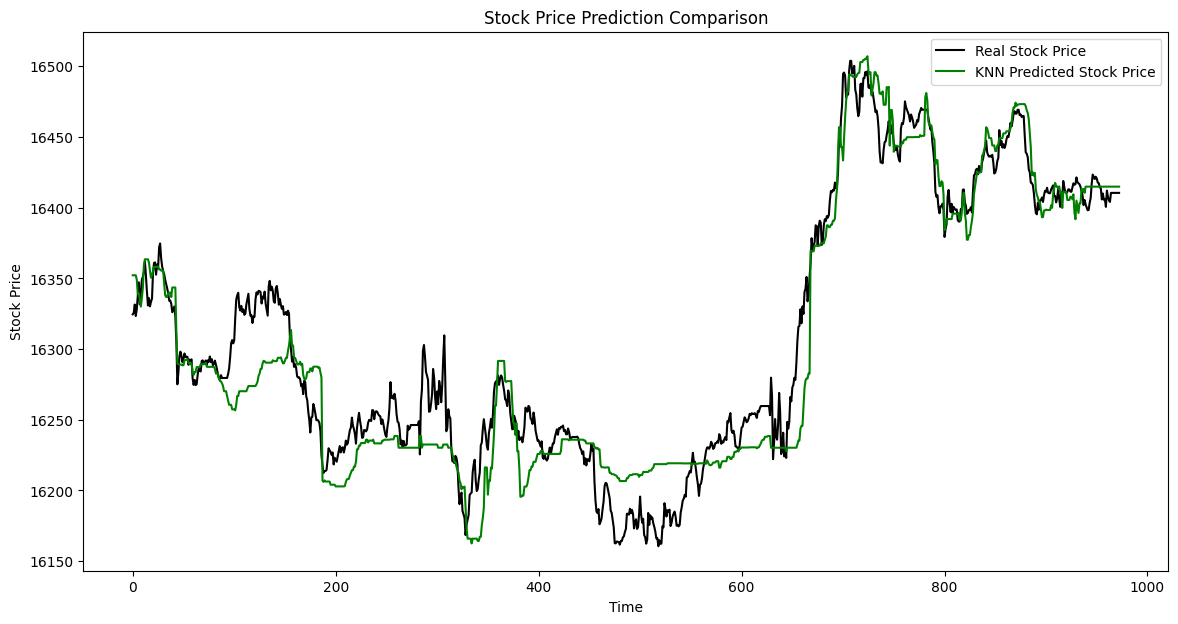

In [ ]:
# KNN
plt.figure(figsize=(14, 7))
plt.plot(real_stock_price, color='black', label='Real Stock Price')
plt.plot(knn_predictions_series, color='green', label='KNN Predicted Stock Price')
plt.title('Stock Price Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

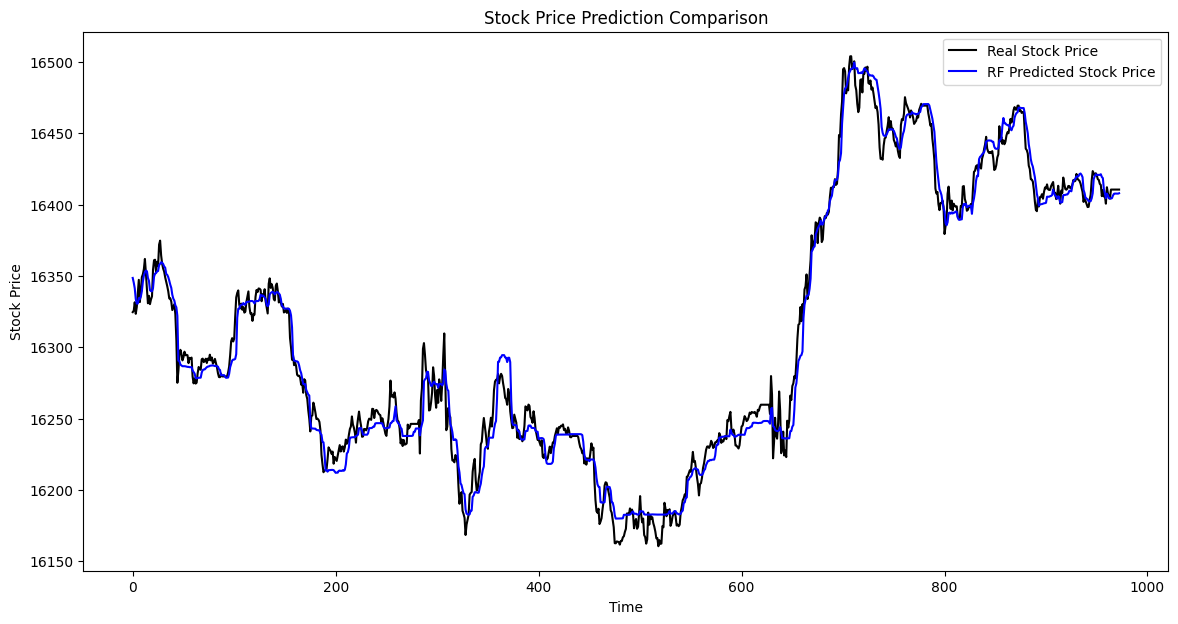

In [ ]:
# RF
plt.figure(figsize=(14, 7))
plt.plot(real_stock_price, color='black', label='Real Stock Price')
plt.plot(rf_predictions_series, color='blue', label='RF Predicted Stock Price')
plt.title('Stock Price Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

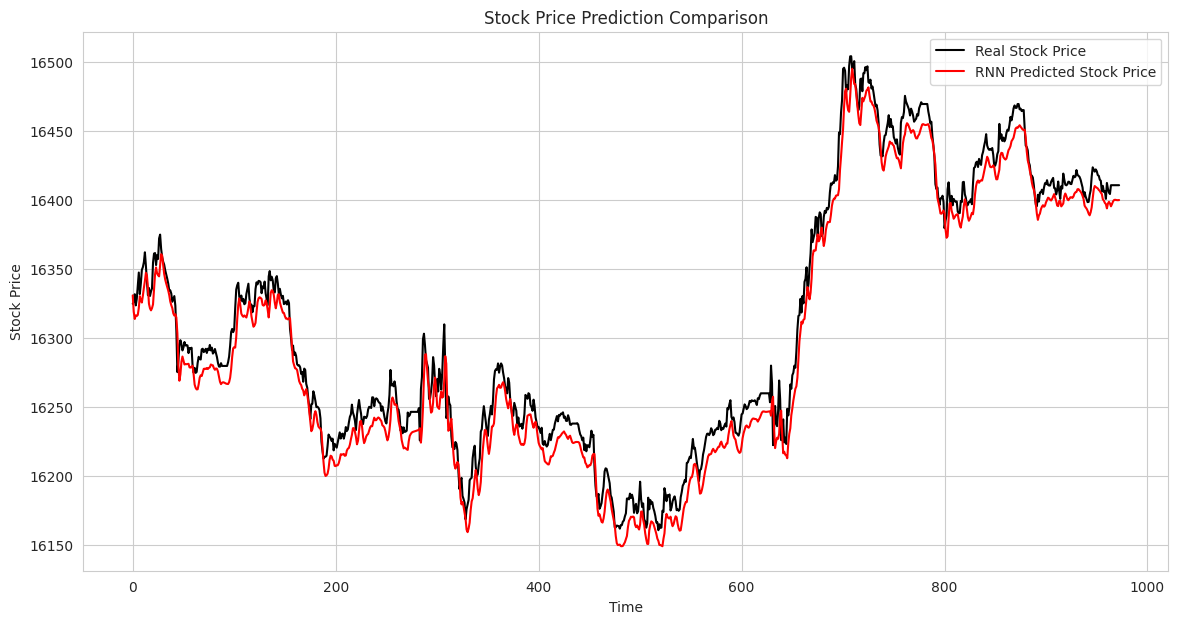

In [ ]:
# RNN
plt.figure(figsize=(14, 7))
plt.plot(real_stock_price, color='black', label='Real Stock Price')
plt.plot(predicted_rnn, color='red', label='RNN Predicted Stock Price')
plt.title('Stock Price Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

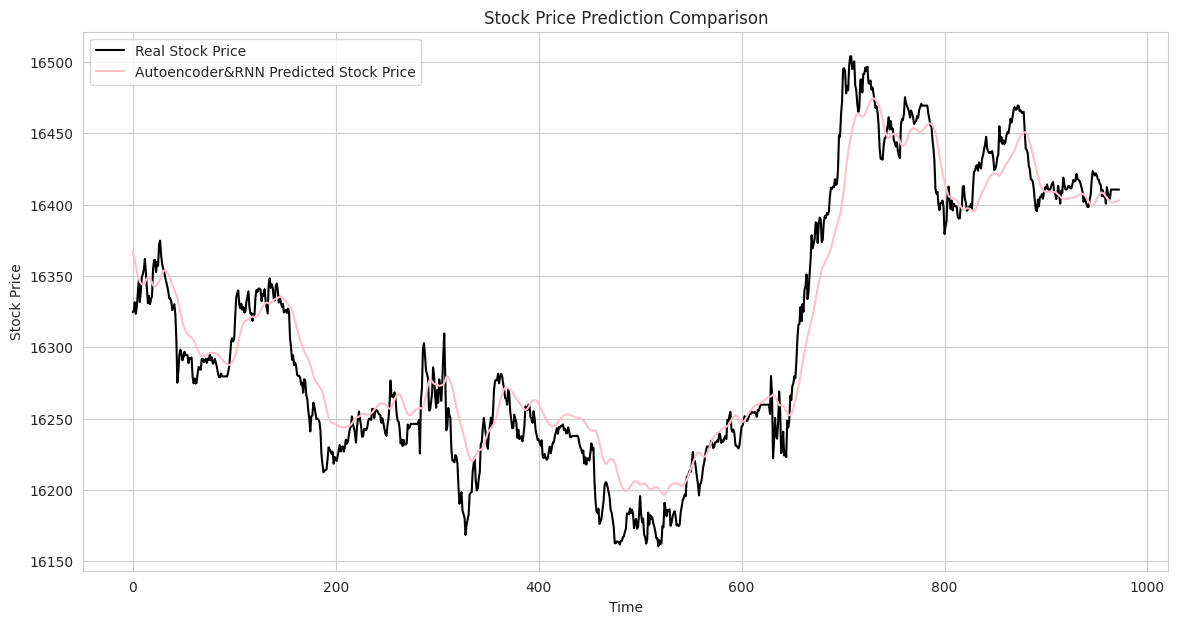

In [ ]:
# Auto + RNN
plt.figure(figsize=(14, 7))
plt.plot(real_stock_price, color='black', label='Real Stock Price')
plt.plot(predicted_au, color='pink', label='Autoencoder&RNN Predicted Stock Price')
plt.title('Stock Price Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Model evaluation

In [ ]:
def evaluate_models(real_stock_price, predictions_dict):
    # Create an empty DataFrame to store the results
    results_df = pd.DataFrame(columns=['Model', 'RMSE', 'MAPE', 'DA'])

    for model_name, predicted_stock_price in predictions_dict.items():
        # Ensure the predicted_stock_price is a NumPy array
        if isinstance(predicted_stock_price, pd.Series):
            predicted_stock_price = predicted_stock_price.to_numpy()

        # Calculate RMSE
        RMSE = np.sqrt(metrics.mean_squared_error(real_stock_price, predicted_stock_price))

        # Calculate MAPE, handling division by zero
        MAPE = np.mean(np.abs((real_stock_price - predicted_stock_price) / real_stock_price)) * 100
        MAPE = np.where(real_stock_price != 0, MAPE, np.nan)
        MAPE = np.nanmean(MAPE)

        # Calculate DA
        real_direction = np.sign(np.diff(real_stock_price, prepend=np.nan))
        predicted_direction = np.sign(np.diff(predicted_stock_price, prepend=np.nan))
        match_direction = np.equal(real_direction, predicted_direction) & (real_direction != 0)
        DA = np.sum(match_direction) / np.sum(real_direction != 0) * 100

        # Append the results to the DataFrame
        results_df = pd.concat(
            [results_df, pd.DataFrame.from_records([{'Model': model_name, 'RMSE': RMSE, 'MAPE': MAPE, 'DA': DA}])],
            ignore_index=True
        )
    return results_df

predictions_dict = {
    'RNN': predicted_rnn.flatten(),
    'KNN': knn_predictions_series.to_numpy(),
    'RF': rf_predictions_series.to_numpy(),
    'XGBoost': xgb_predictions_series.to_numpy(),
    'SVM': svm_predictions_series.to_numpy(),
    'Auto+RNN': predicted_au.flatten()
}

real_stock_price = real_stock_price.flatten()  # Assuming real_stock_price is a NumPy array

results_table = evaluate_models(real_stock_price, predictions_dict)
results_table

,Model,RMSE,MAPE,DA
0,RNN,15.523247,0.083564,52.299465
1,KNN,26.290832,0.122604,28.235294
2,RF,10.952368,0.051258,60.534759
3,XGBoost,18.939274,0.088364,51.229947
4,SVM,8.920218,0.041099,68.983957
5,Auto+RNN,22.645132,0.108829,48.877005


<ipython-input-56-c402331ff0dd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=results_table, palette='viridis')


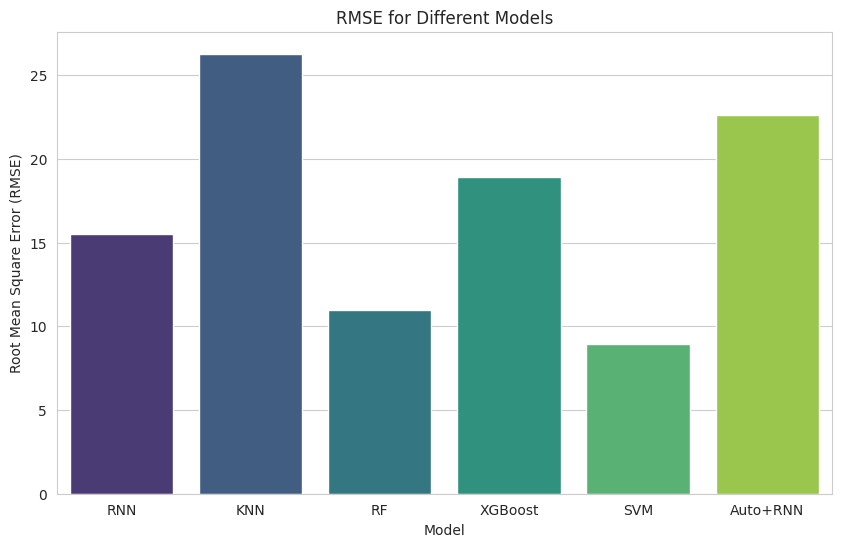

In [ ]:
sns.set_style('whitegrid')

# Creating a bar plot for RMSE
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=results_table, palette='viridis')
plt.title('RMSE for Different Models')
plt.ylabel('Root Mean Square Error (RMSE)')
plt.xlabel('Model')
plt.show()


<ipython-input-57-06d777db834b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAPE', data=results_table, palette='magma')


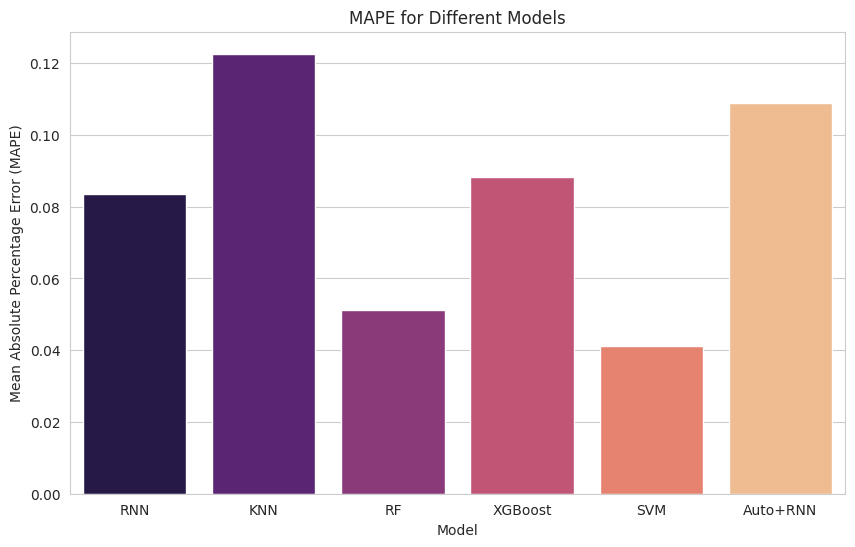

In [ ]:
# Creating a bar plot for MAPE
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MAPE', data=results_table, palette='magma')
plt.title('MAPE for Different Models')
plt.ylabel('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Model')
plt.show()

<ipython-input-58-5c03aaa94587>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='DA', data=results_table, palette='cubehelix')


Text(0.5, 0, 'Model')

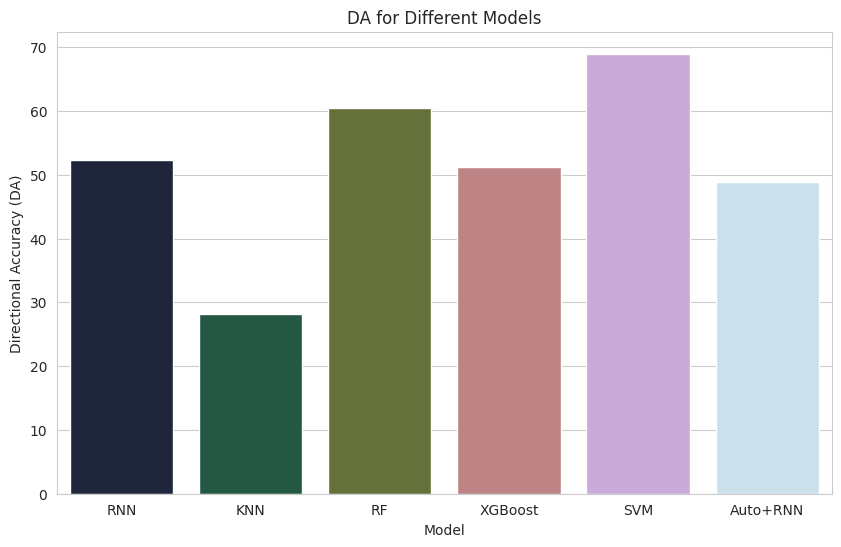

In [ ]:
# Creating a bar plot for DA
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='DA', data=results_table, palette='cubehelix')
plt.title('DA for Different Models')
plt.ylabel('Directional Accuracy (DA)')
plt.xlabel('Model')